# LGMVIP- DataScience - Internship

## Task3:  Music Recommendation Using Random Forest and XGboost

### Author: DANIEL JOSEPH RAJ I

In [1]:
#Load Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
#Read the data
music_df = pd.read_csv("train.csv")
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
music_df.shape

(7377418, 6)

In [4]:
#sampling the data to return a random sample of items from an axis of object.
music_df = music_df.sample(frac=0.1)

In [5]:
music_df.describe()

,target
count,737742.000000
mean,0.503879
std,0.499985
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737742 entries, 2807552 to 792264
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                737742 non-null  object
 1   song_id             737742 non-null  object
 2   source_system_tab   735205 non-null  object
 3   source_screen_name  696323 non-null  object
 4   source_type         735555 non-null  object
 5   target              737742 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 39.4+ MB


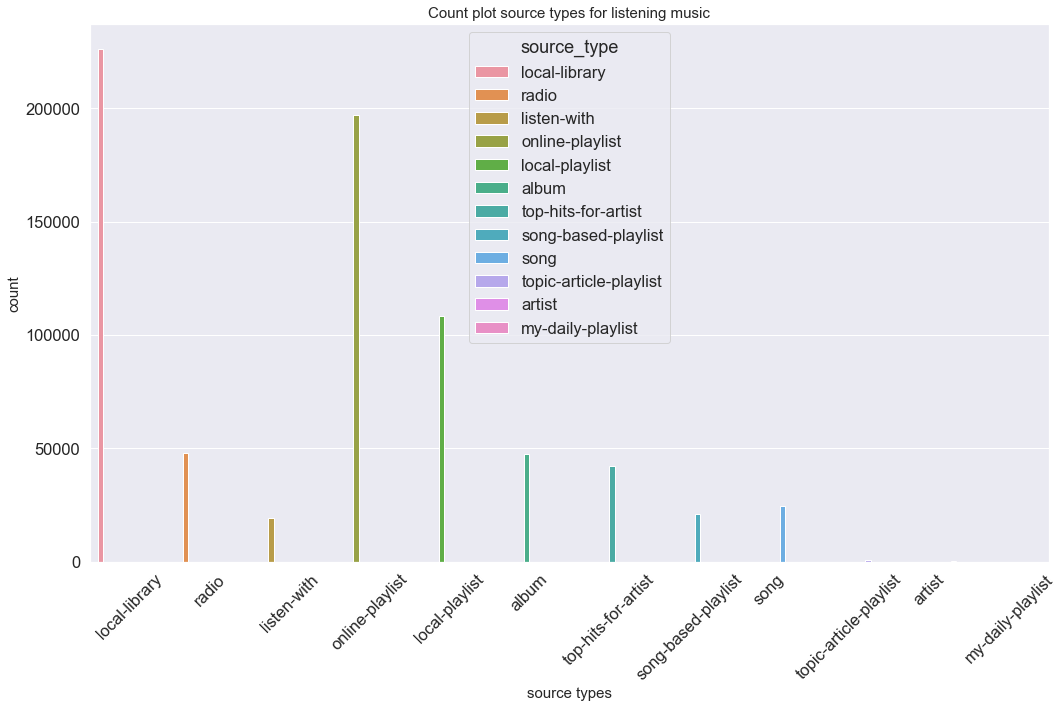

In [7]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_type',hue='source_type',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=15)
plt.tight_layout()

we can see that local library are more perffered than any other source types as well after that online playlist

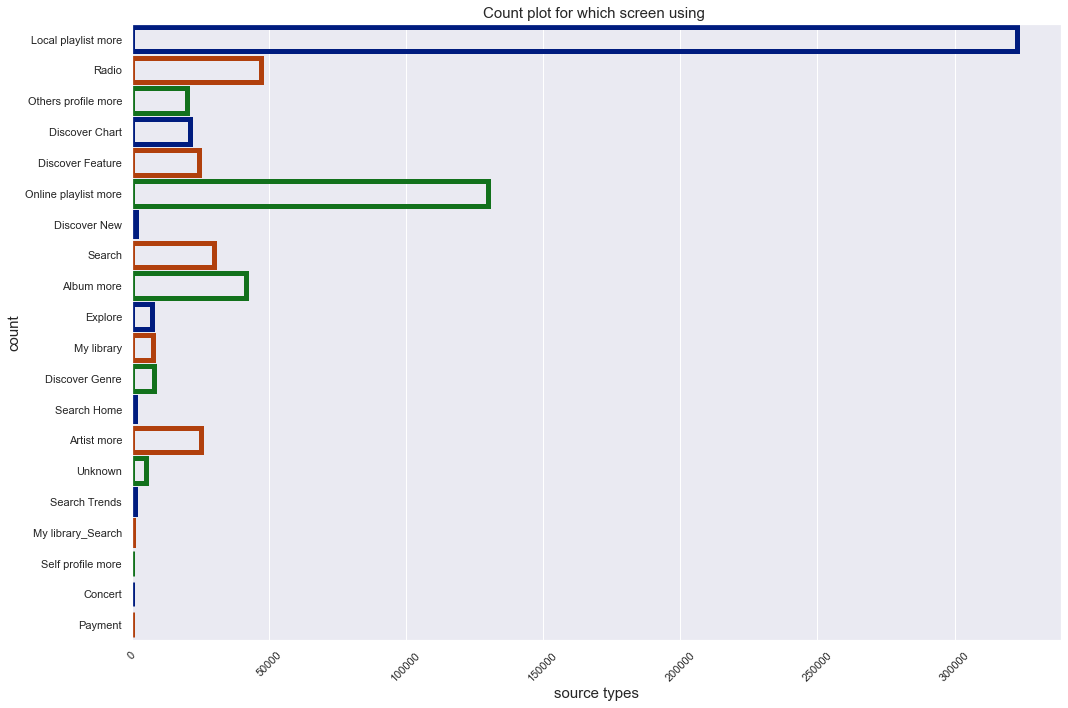

In [8]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.countplot(y='source_screen_name',data=music_df,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for which screen using ',fontsize=15)
plt.tight_layout()

we can see that local play list has the highest preference

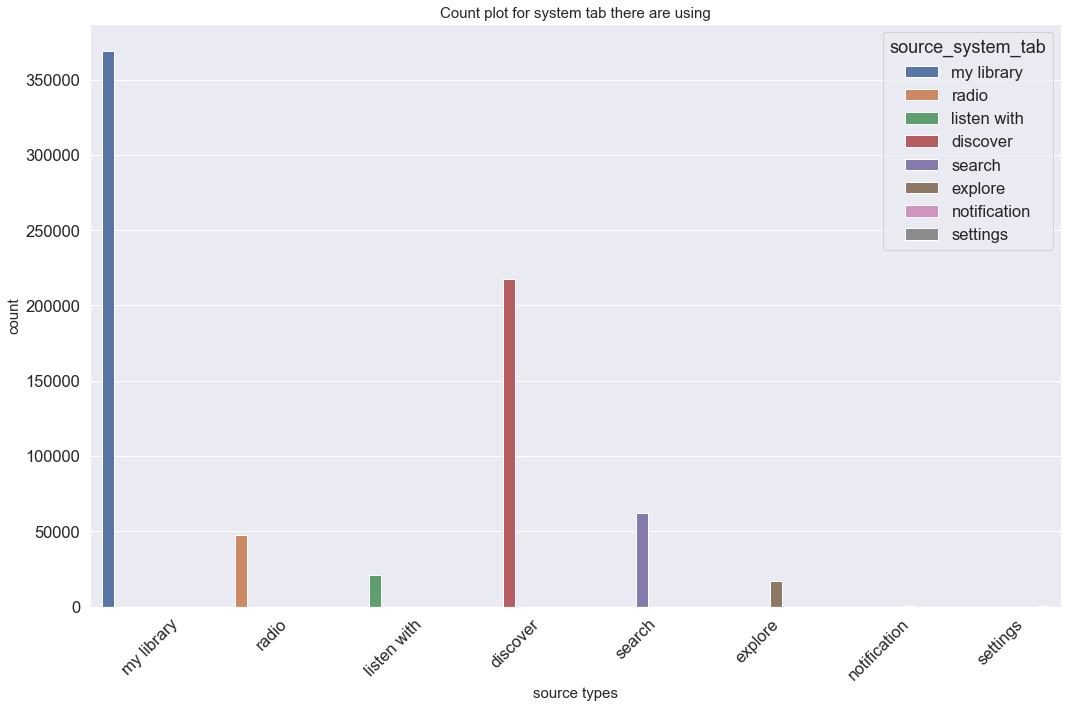

In [9]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=music_df)
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=15)
plt.tight_layout()

In [10]:
#Read the music_df file
music_df = music_df.sample(frac=0.1)

In [11]:
songs_df = pd.read_csv("songs.csv")
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [12]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [13]:
#Merge that file into existing dataframe
music_df = pd.merge(music_df, songs_df,on="song_id", how="left")
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,AeHDZFn+zGgCoRyM3rYxWLxaPN07oPtudkt2fA/f+DU=,xlSau5zD9aAEYCxGpeiQN9Rnl1GwhPvR+4ER22Jrab8=,discover,Online playlist more,online-playlist,0,194716.0,465,Kris Kross Amsterdam & Conor Maynard,Diederik van Elsas| Bernard Wright| Jordy Huis...,NaN,52.0
1,i2+v5ji2pBDHjZvqR5AOm+vFWjK2dmW5p7vOdDcAktU=,S4b72PvFX/h4pkwpm6ghNLj0LK7ccdCembsXfoWRekk=,my library,Local playlist more,local-library,0,205008.0,465,安心亞 (Amber An),Patrick McIntyre/許媛婷,Mark Vallance/劉中怡,3.0
2,B2Bj6if0bb04UEvQzpaLl5p+jXGI5g8DP76KPlKuUe4=,THqGcrzQyUhBn1NI/+Iptc1vKtxBIEg0uA8iaoJnO1Q=,my library,Local playlist more,local-playlist,1,218592.0,465,玖壹壹,陳皓宇,廖建至 洪瑜鴻 陳皓宇,3.0
3,eOuh3bkEzPSvgFlFBEsCuRWzUF8+QTlZQB4Smu+dIC4=,Dub/58C/VRqFcbu50Cm1YK/aCb8VouuTLxrRma6UHrA=,my library,Local playlist more,local-playlist,0,159660.0,958,貴族精選,Gabriel Faure,NaN,-1.0
4,8cX8QtD/k7cVXrWOJpG9KqcN78aqC+Yw4ii8XALYWS8=,jrfacJFUf7TUXST/aQ8K+8TMCqEwISBeyi5a6COJgqY=,discover,Online playlist more,online-playlist,0,202385.0,2022,Shirley Grimes,NaN,NaN,52.0


In [14]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                73774 non-null  object 
 1   song_id             73774 non-null  object 
 2   source_system_tab   73490 non-null  object 
 3   source_screen_name  69532 non-null  object 
 4   source_type         73526 non-null  object 
 5   target              73774 non-null  int64  
 6   song_length         73772 non-null  float64
 7   genre_ids           72629 non-null  object 
 8   artist_name         73772 non-null  object 
 9   composer            57103 non-null  object 
 10  lyricist            42238 non-null  object 
 11  language            73771 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 7.3+ MB


In [15]:
#reading the members file
members_df = pd.read_csv("members.csv")
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [16]:
#merging it into original dataframe
music_df = pd.merge(music_df, members_df, on="msno", how="left")
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73490 non-null  object 
 3   source_screen_name      69532 non-null  object 
 4   source_type             73526 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73772 non-null  float64
 7   genre_ids               72629 non-null  object 
 8   artist_name             73772 non-null  object 
 9   composer                57103 non-null  object 
 10  lyricist                42238 non-null  object 
 11  language                73771 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  43990 non-null

In [17]:
#check for null values now
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab          True
source_screen_name         True
source_type                True
target                    False
song_length                True
genre_ids                  True
artist_name                True
composer                   True
lyricist                   True
language                   True
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [18]:
# since we have null values, we replace null values
for item in music_df.select_dtypes(include=['object']).columns:
    music_df[item][music_df[item].isnull()]='unknown'
music_df = music_df.fillna(value=0)

In [19]:
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,AeHDZFn+zGgCoRyM3rYxWLxaPN07oPtudkt2fA/f+DU=,xlSau5zD9aAEYCxGpeiQN9Rnl1GwhPvR+4ER22Jrab8=,discover,Online playlist more,online-playlist,0,194716.0,465,Kris Kross Amsterdam & Conor Maynard,Diederik van Elsas| Bernard Wright| Jordy Huis...,unknown,52.0,5,24,male,7,20140311,20170908
1,i2+v5ji2pBDHjZvqR5AOm+vFWjK2dmW5p7vOdDcAktU=,S4b72PvFX/h4pkwpm6ghNLj0LK7ccdCembsXfoWRekk=,my library,Local playlist more,local-library,0,205008.0,465,安心亞 (Amber An),Patrick McIntyre/許媛婷,Mark Vallance/劉中怡,3.0,4,0,unknown,9,20150120,20170918
2,B2Bj6if0bb04UEvQzpaLl5p+jXGI5g8DP76KPlKuUe4=,THqGcrzQyUhBn1NI/+Iptc1vKtxBIEg0uA8iaoJnO1Q=,my library,Local playlist more,local-playlist,1,218592.0,465,玖壹壹,陳皓宇,廖建至 洪瑜鴻 陳皓宇,3.0,1,0,unknown,7,20131208,20171007
3,eOuh3bkEzPSvgFlFBEsCuRWzUF8+QTlZQB4Smu+dIC4=,Dub/58C/VRqFcbu50Cm1YK/aCb8VouuTLxrRma6UHrA=,my library,Local playlist more,local-playlist,0,159660.0,958,貴族精選,Gabriel Faure,unknown,-1.0,3,29,female,9,20111205,20171221
4,8cX8QtD/k7cVXrWOJpG9KqcN78aqC+Yw4ii8XALYWS8=,jrfacJFUf7TUXST/aQ8K+8TMCqEwISBeyi5a6COJgqY=,discover,Online playlist more,online-playlist,0,202385.0,2022,Shirley Grimes,unknown,unknown,52.0,6,20,male,9,20130919,20171017


In [20]:
music_df.isnull().any()

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
city                      False
bd                        False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [21]:
#Seperate Dates
music_df.registration_init_time = pd.to_datetime(music_df.registration_init_time, format="%Y%m%d",errors='ignore')
music_df["registration_init_time_year"]  = music_df.registration_init_time.dt.year
music_df["registration_init_time_month"] = music_df.registration_init_time.dt.month
music_df["registration_init_time_day"]   = music_df.registration_init_time.dt.day

#expiration date
music_df.expiration_date = pd.to_datetime(music_df.expiration_date,  format='%Y%m%d', errors='ignore')
music_df['expiration_date_year'] = music_df['expiration_date'].dt.year
music_df['expiration_date_month'] = music_df['expiration_date'].dt.month
music_df['expiration_date_day'] = music_df['expiration_date'].dt.day

In [22]:
#Dates to categoty
music_df['registration_init_time'] = music_df['registration_init_time'].astype('category')
music_df['expiration_date'] = music_df['expiration_date'].astype('category')

In [23]:
music_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,AeHDZFn+zGgCoRyM3rYxWLxaPN07oPtudkt2fA/f+DU=,xlSau5zD9aAEYCxGpeiQN9Rnl1GwhPvR+4ER22Jrab8=,discover,Online playlist more,online-playlist,0,194716.0,465,Kris Kross Amsterdam & Conor Maynard,Diederik van Elsas| Bernard Wright| Jordy Huis...,...,male,7,2014-03-11,2017-09-08,2014,3,11,2017,9,8
1,i2+v5ji2pBDHjZvqR5AOm+vFWjK2dmW5p7vOdDcAktU=,S4b72PvFX/h4pkwpm6ghNLj0LK7ccdCembsXfoWRekk=,my library,Local playlist more,local-library,0,205008.0,465,安心亞 (Amber An),Patrick McIntyre/許媛婷,...,unknown,9,2015-01-20,2017-09-18,2015,1,20,2017,9,18
2,B2Bj6if0bb04UEvQzpaLl5p+jXGI5g8DP76KPlKuUe4=,THqGcrzQyUhBn1NI/+Iptc1vKtxBIEg0uA8iaoJnO1Q=,my library,Local playlist more,local-playlist,1,218592.0,465,玖壹壹,陳皓宇,...,unknown,7,2013-12-08,2017-10-07,2013,12,8,2017,10,7
3,eOuh3bkEzPSvgFlFBEsCuRWzUF8+QTlZQB4Smu+dIC4=,Dub/58C/VRqFcbu50Cm1YK/aCb8VouuTLxrRma6UHrA=,my library,Local playlist more,local-playlist,0,159660.0,958,貴族精選,Gabriel Faure,...,female,9,2011-12-05,2017-12-21,2011,12,5,2017,12,21
4,8cX8QtD/k7cVXrWOJpG9KqcN78aqC+Yw4ii8XALYWS8=,jrfacJFUf7TUXST/aQ8K+8TMCqEwISBeyi5a6COJgqY=,discover,Online playlist more,online-playlist,0,202385.0,2022,Shirley Grimes,unknown,...,male,9,2013-09-19,2017-10-17,2013,9,19,2017,10,17


In [24]:
music = music_df.copy()

In [25]:
for item in music.columns:
    if music[item].dtype == 'object':
        music[item] = music[item].astype('category')

In [26]:
#convert into encoding after categorical data
for col in music.select_dtypes(include=['category']).columns:
    music[col] = music[col].cat.codes

In [27]:
music.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.002480,0.007114,-0.002504,-0.004310,0.000747,0.007359,0.007068,0.007503,0.003100,...,-0.007036,-0.002126,0.000692,0.008251,0.000538,0.007807,0.009947,0.003902,0.001949,0.004611
song_id,-0.002480,1.000000,-0.007622,-0.002079,0.004757,-0.005455,-0.013890,0.006133,-0.017867,-0.038121,...,0.003795,0.001578,-0.001498,-0.008238,-0.001518,0.002561,0.003896,-0.001580,-0.007048,-0.001350
source_system_tab,0.007114,-0.007622,1.000000,-0.036608,-0.081519,0.030355,0.027779,0.045434,0.034153,0.054882,...,-0.021502,0.032048,-0.047710,0.059041,-0.041960,-0.021698,0.006361,0.040733,0.014092,0.011901
source_screen_name,-0.002504,-0.002079,-0.036608,1.000000,0.418206,-0.059478,0.023566,-0.021870,0.011352,0.021136,...,0.018686,-0.035257,0.036914,-0.028983,0.034695,0.008501,-0.005351,-0.018958,-0.012308,-0.004696
source_type,-0.004310,0.004757,-0.081519,0.418206,1.000000,-0.125400,0.015625,-0.044235,-0.012477,0.001526,...,0.031293,-0.026806,0.037305,-0.040762,0.034310,0.010097,0.006559,-0.035118,0.000840,-0.006793
target,0.000747,-0.005455,0.030355,-0.059478,-0.125400,1.000000,-0.001837,0.015651,0.019092,0.004735,...,-0.016289,0.010048,-0.004130,0.056599,-0.003054,-0.003805,-0.003043,0.043440,0.004583,0.008528
song_length,0.007359,-0.013890,0.027779,0.023566,0.015625,-0.001837,1.000000,0.028922,0.102995,0.084614,...,0.002702,0.004041,-0.011182,0.008435,-0.010659,-0.002769,0.000170,0.002946,0.008456,0.000421
genre_ids,0.007068,0.006133,0.045434,-0.021870,-0.044235,0.015651,0.028922,1.000000,0.199194,0.145043,...,-0.002066,0.000063,0.002993,0.000679,0.002406,0.003377,0.002090,0.002621,-0.005086,0.000370
artist_name,0.007503,-0.017867,0.034153,0.011352,-0.012477,0.019092,0.102995,0.199194,1.000000,0.351739,...,-0.006699,0.000327,-0.002777,0.011667,-0.003699,0.004128,-0.003170,0.007083,0.002229,0.007721
composer,0.003100,-0.038121,0.054882,0.021136,0.001526,0.004735,0.084614,0.145043,0.351739,1.000000,...,-0.004438,-0.006156,-0.004799,0.007429,-0.004171,0.000669,-0.002325,0.004713,0.000006,-0.001376


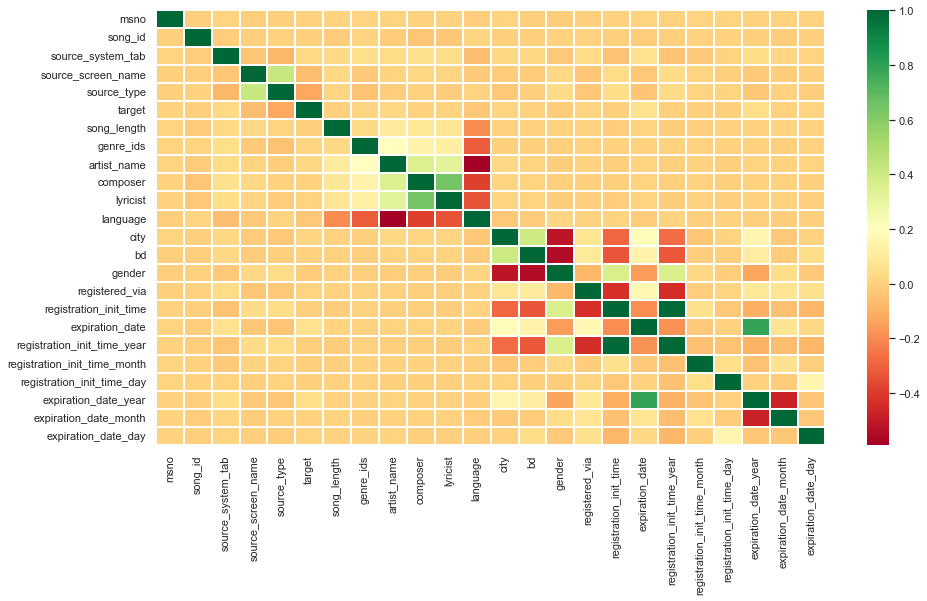

In [28]:
#Generating heatmap for correlation plot
plt.figure(figsize=[15,8])
sns.heatmap(music.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

## Modelling and Predicting

In [29]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(music[music.columns[music.columns != 'target']], music.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

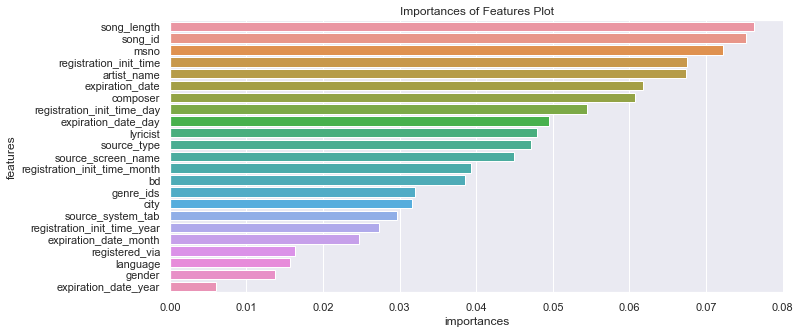

In [30]:
music_plot = pd.DataFrame({'features': music.columns[music.columns != 'target'],'importances': model.feature_importances_})
music_plot = music_plot.sort_values('importances', ascending=False)

#plotting the importance of features
plt.figure(figsize=[11,5])
sns.barplot(x = music_plot.importances, y = music_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [31]:
model.feature_importances_

array([0.07220069, 0.07516322, 0.02964248, 0.04488692, 0.04710308,
       0.07632293, 0.03201881, 0.0673641 , 0.06078519, 0.04790433,
       0.01569628, 0.03158843, 0.03850168, 0.013699  , 0.01638713,
       0.06756692, 0.06183765, 0.02730365, 0.03933307, 0.05451593,
       0.00601685, 0.02470066, 0.049461  ])

In [33]:
music = music.drop(music_plot.features[music_plot.importances < 0.04].tolist(),1)

In [35]:
music.columns.to_list()

['msno',
 'song_id',
 'source_screen_name',
 'source_type',
 'target',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'registration_init_time',
 'expiration_date',
 'registration_init_time_day',
 'expiration_date_day']

In [36]:
target = music.pop('target')

In [39]:
#training and splitting then using xgb boost
X_train, X_test, y_train, y_test = train_test_split(music, target, test_size = 0.25)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(X_train, y_train)

[00:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
predict_labels = model.predict(X_test)
print(metrics.classification_report(y_test, predict_labels))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9085
           1       0.62      0.64      0.63      9359

    accuracy                           0.62     18444
   macro avg       0.62      0.62      0.62     18444
weighted avg       0.62      0.62      0.62     18444



In [42]:
print(metrics.accuracy_score(y_test, predict_labels))

0.6220993276946433


In [ ]:
#--------------------------------------------------------------------#